In [1]:
import numpy as np
import pandas as pd

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score


In [4]:
!conda install -c conda-forge imbalanced-learn


Solving environment: done

# All requested packages already installed.



In [5]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
from sklearn.datasets import california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import xgboost as xgb

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


/home/kmetcalf8/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
funds_df = pd.read_csv(r'C:\Users\krystynametcalf\Desktop\funds_df.csv')

In [5]:
funds_df.columns

Index(['company_name', 'Round_A', 'funded_year_A', 'raised_A', 'Round_B',
       'funded_year_B', 'raised_B', 'Round_C', 'raised_C', 'CHN', 'DEU', 'GBR',
       'Other_Country', 'USA', 'Biotechnology', 'E-Commerce',
       'Enterprise Software', 'Mobile', 'Other_Industry', 'Software',
       'Beijing', 'London', 'New York', 'Other_City', 'San Francisco', 'seed',
       'undisclosed', 'venture', 'None', 'venture.1', 'None.1',
       'private_equity', 'venture.2'],
      dtype='object')

In [6]:
funds_df = funds_df.rename(columns={'seed': 'Seed_A', 'undisclosed': 'Undisclosed_A', 'venture': 'Venture_A',
                                   'None' : 'None_A', 'venture.1' : 'Venture_B', 'none.1' : 'None_B', 'private_equity' :
                                   'Private_Equity_B', 'venture.2' : 'Venture_C'})

In [7]:
funds_df.columns

Index(['company_name', 'Round_A', 'funded_year_A', 'raised_A', 'Round_B',
       'funded_year_B', 'raised_B', 'Round_C', 'raised_C', 'CHN', 'DEU', 'GBR',
       'Other_Country', 'USA', 'Biotechnology', 'E-Commerce',
       'Enterprise Software', 'Mobile', 'Other_Industry', 'Software',
       'Beijing', 'London', 'New York', 'Other_City', 'San Francisco',
       'Seed_A', 'Undisclosed_A', 'Venture_A', 'None_A', 'Venture_B', 'None.1',
       'Private_Equity_B', 'Venture_C'],
      dtype='object')

In [8]:
funds_df = funds_df.drop(columns=['company_name', 'Round_A', 'raised_C', 'Venture_C'])

In [9]:
import xgboost as xgb

X = funds_df.drop('Round_C', axis=1)
y = funds_df['Round_C']

In [10]:
funds_df.groupby('Round_C').mean()

,funded_year_A,raised_A,Round_B,funded_year_B,raised_B,CHN,DEU,GBR,Other_Country,USA,...,New York,Other_City,San Francisco,Seed_A,Undisclosed_A,Venture_A,None_A,Venture_B,None.1,Private_Equity_B
Round_C,,,,,,,,,,,,,,,,,,,,,
0,2010.378855,6.014822e+06,0.268489,2014.672821,3.220500e+06,0.064054,0.024239,0.041568,0.262610,0.607530,...,0.059412,0.809180,0.083239,0.001031,0.000103,0.998865,0.731511,0.268489,1.0,0.000000
1,2007.420686,6.426909e+06,0.900322,2009.600750,1.183355e+07,0.072883,0.010182,0.026259,0.122722,0.767953,...,0.066988,0.757235,0.123794,0.000000,0.000000,1.000000,0.099678,0.900322,0.0,0.000536


### Observations

- The average year for companies to receive Round A funding that received Round C funding was 2007, prior to the 2008 recession. 

- More likely the company was based in the US, in San Francisco, if it received Round C funding

- Venture Capital funding was the most likely to lead to Round C funding



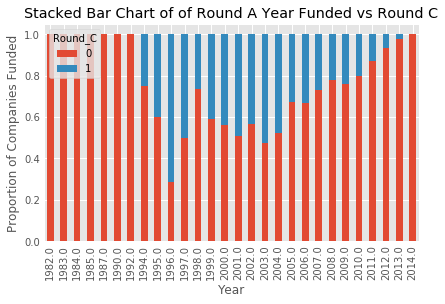

In [11]:
table=pd.crosstab(funds_df.funded_year_A,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of of Round A Year Funded vs Round C')
plt.xlabel('Year')
plt.ylabel('Proportion of Companies Funded')
plt.savefig('mariral_vs_pur_stack')

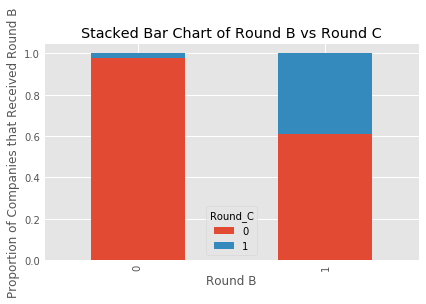

In [12]:
table=pd.crosstab(funds_df.Round_B,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Round B vs Round C')
plt.xlabel('Round B')
plt.ylabel('Proportion of Companies that Received Round B')
plt.savefig('mariral_vs_pur_stack')

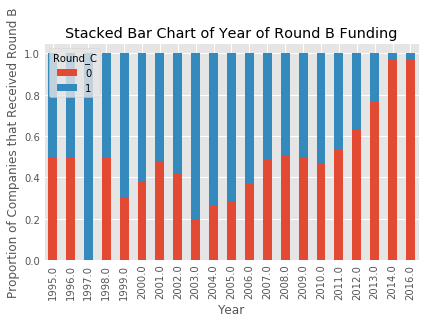

In [13]:
table=pd.crosstab(funds_df.funded_year_B,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Year of Round B Funding')
plt.xlabel('Year')
plt.ylabel('Proportion of Companies that Received Round B')
plt.savefig('mariral_vs_pur_stack')

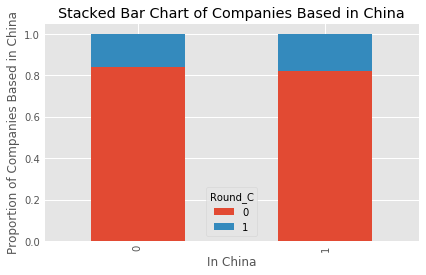

In [14]:
table=pd.crosstab(funds_df.CHN,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Based in China')
plt.xlabel('In China')
plt.ylabel('Proportion of Companies Based in China')
plt.savefig('mariral_vs_pur_stack')

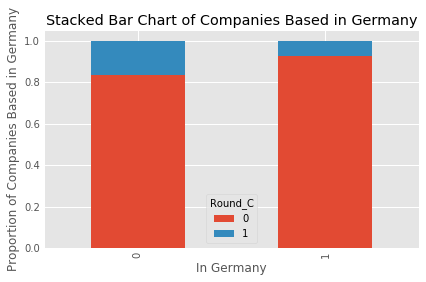

In [15]:
table=pd.crosstab(funds_df.DEU,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Based in Germany')
plt.xlabel('In Germany')
plt.ylabel('Proportion of Companies Based in Germany')
plt.savefig('mariral_vs_pur_stack')

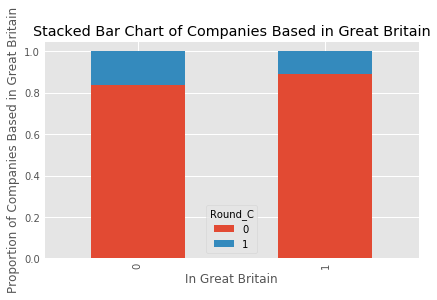

In [16]:
table=pd.crosstab(funds_df.GBR,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Based in Great Britain')
plt.xlabel('In Great Britain')
plt.ylabel('Proportion of Companies Based in Great Britain')
plt.savefig('mariral_vs_pur_stack')

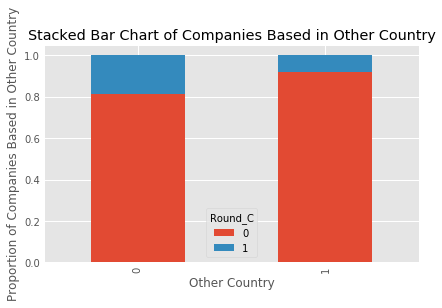

In [17]:
table=pd.crosstab(funds_df.Other_Country,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Based in Other Country')
plt.xlabel('Other Country')
plt.ylabel('Proportion of Companies Based in Other Country')
plt.savefig('mariral_vs_pur_stack')

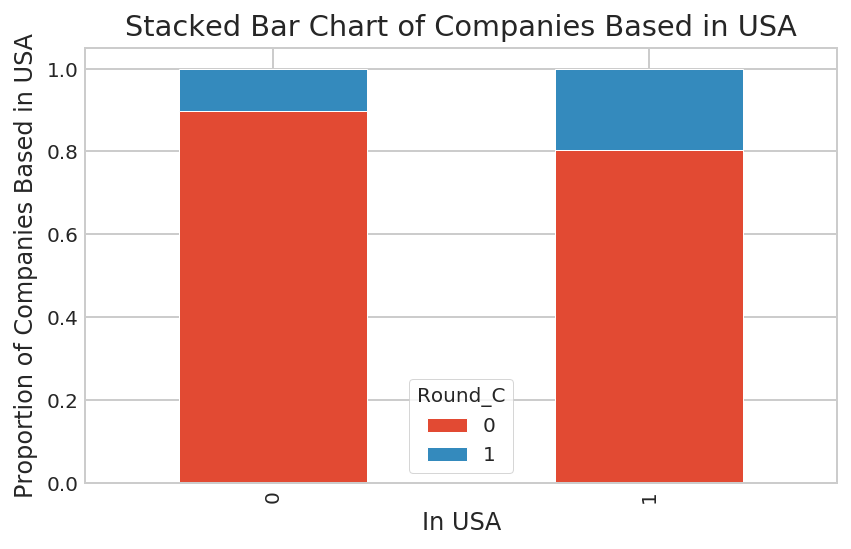

In [220]:
table=pd.crosstab(funds_df.USA,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Based in USA')
plt.xlabel('In USA')
plt.ylabel('Proportion of Companies Based in USA')
plt.savefig('mariral_vs_pur_stack')

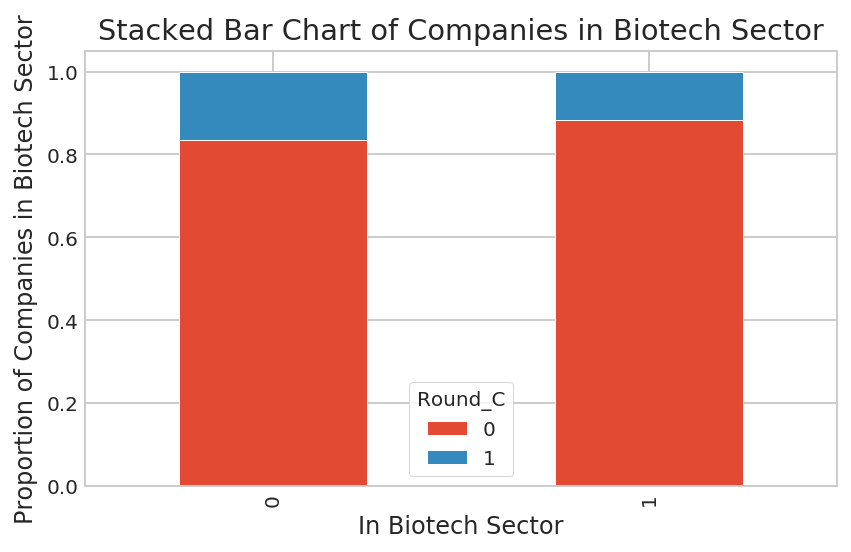

In [221]:
table=pd.crosstab(funds_df.Biotechnology,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Biotech Sector')
plt.xlabel('In Biotech Sector')
plt.ylabel('Proportion of Companies in Biotech Sector')
plt.savefig('mariral_vs_pur_stack')

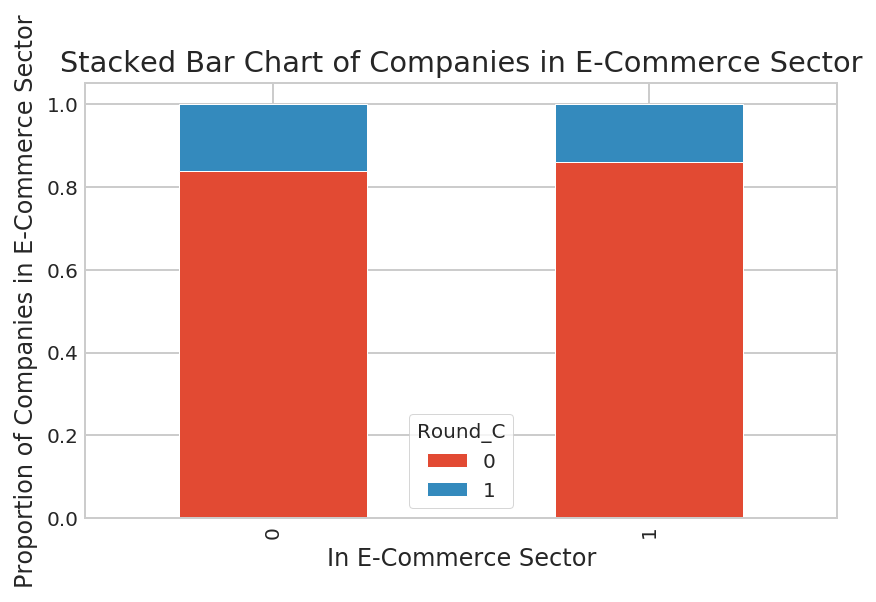

In [222]:
table=pd.crosstab(funds_df['E-Commerce'],funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in E-Commerce Sector')
plt.xlabel('In E-Commerce Sector')
plt.ylabel('Proportion of Companies in E-Commerce Sector')
plt.savefig('mariral_vs_pur_stack')

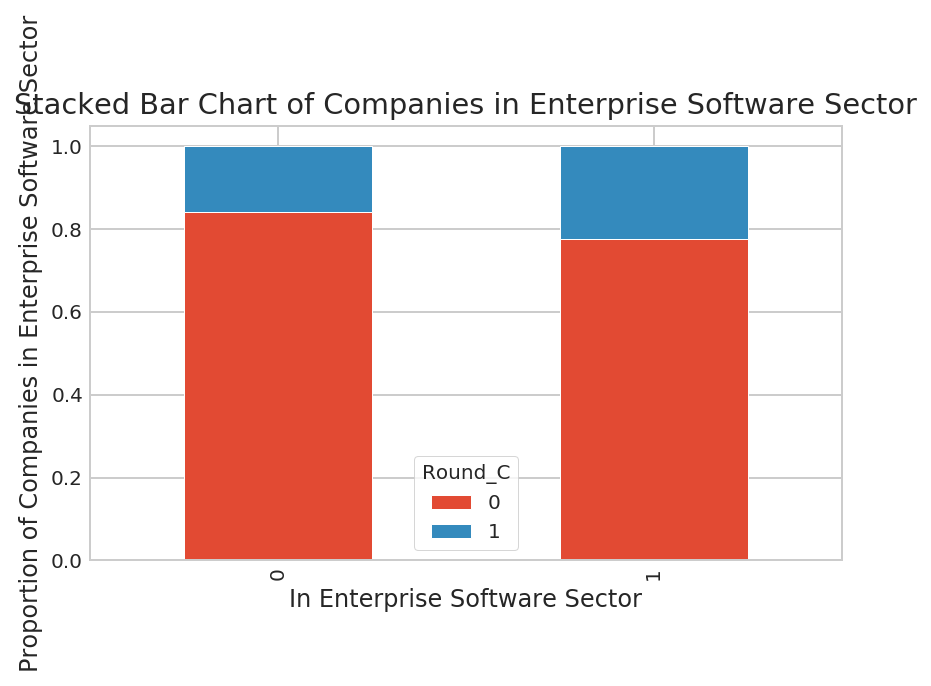

In [223]:
table=pd.crosstab(funds_df['Enterprise Software'],funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Enterprise Software Sector')
plt.xlabel('In Enterprise Software Sector')
plt.ylabel('Proportion of Companies in Enterprise Software Sector')
plt.savefig('mariral_vs_pur_stack')

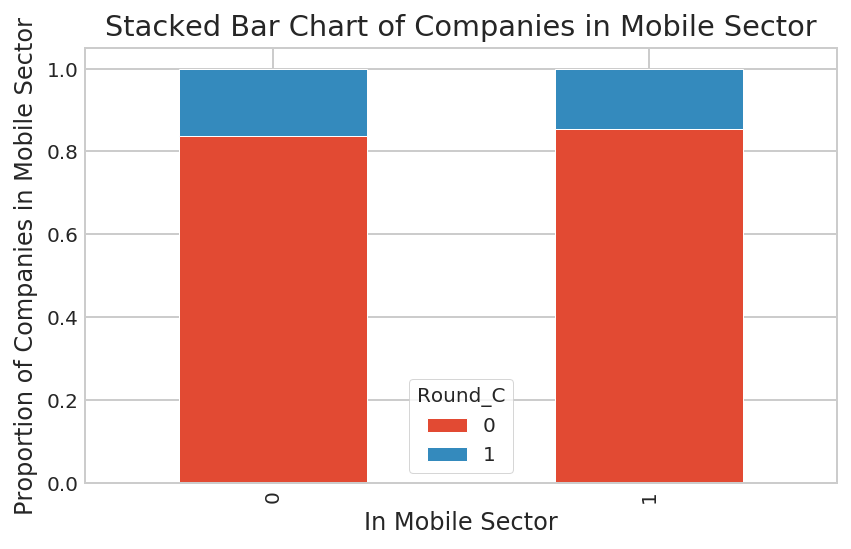

In [224]:
table=pd.crosstab(funds_df.Mobile,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Mobile Sector')
plt.xlabel('In Mobile Sector')
plt.ylabel('Proportion of Companies in Mobile Sector')
plt.savefig('mariral_vs_pur_stack')

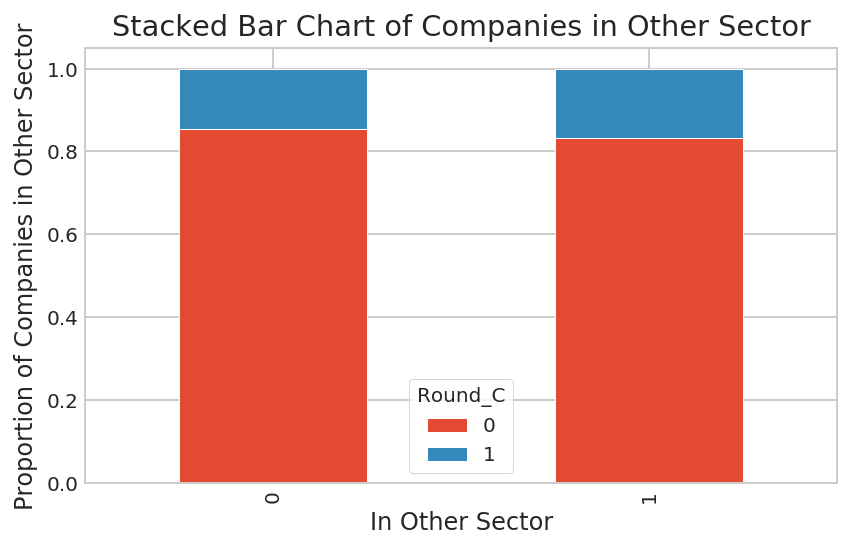

In [225]:
table=pd.crosstab(funds_df.Other_Industry,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Other Sector')
plt.xlabel('In Other Sector')
plt.ylabel('Proportion of Companies in Other Sector')
plt.savefig('mariral_vs_pur_stack')

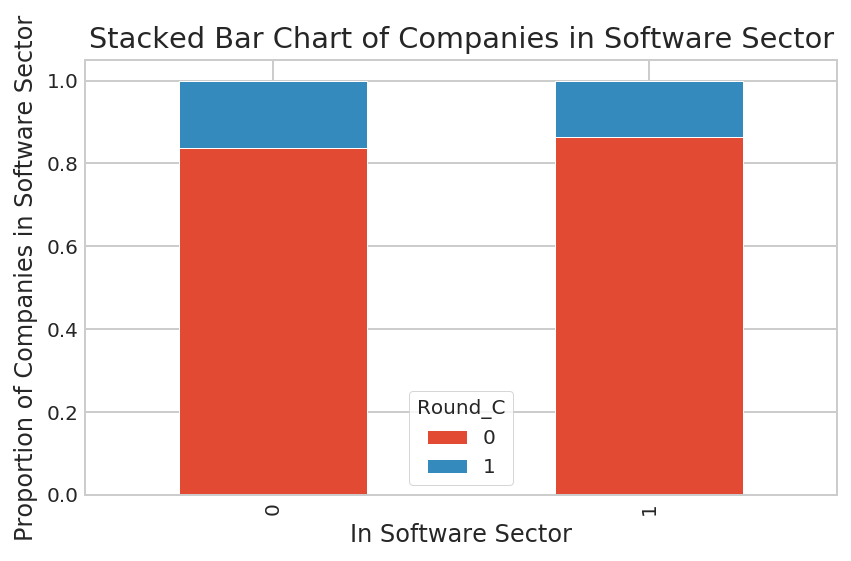

In [226]:
table=pd.crosstab(funds_df.Software,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Software Sector')
plt.xlabel('In Software Sector')
plt.ylabel('Proportion of Companies in Software Sector')
plt.savefig('mariral_vs_pur_stack')

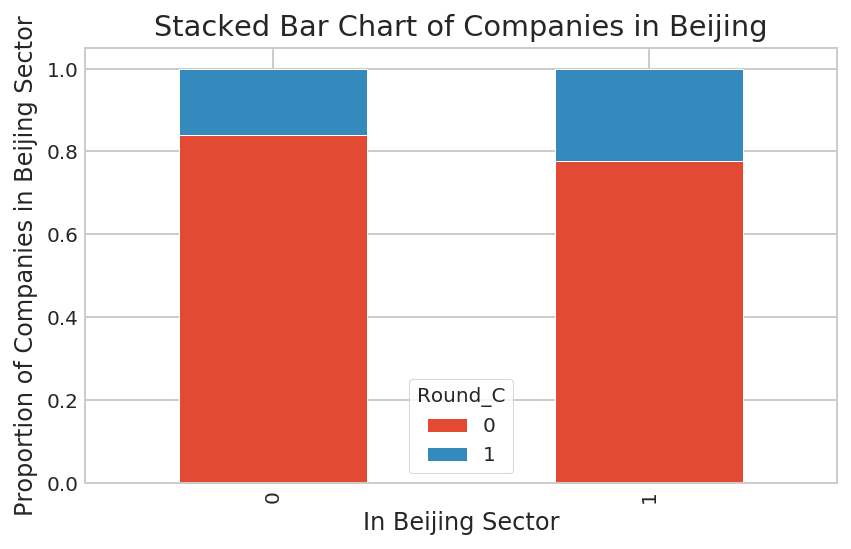

In [227]:
table=pd.crosstab(funds_df.Beijing,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Beijing')
plt.xlabel('In Beijing Sector')
plt.ylabel('Proportion of Companies in Beijing Sector')
plt.savefig('mariral_vs_pur_stack')

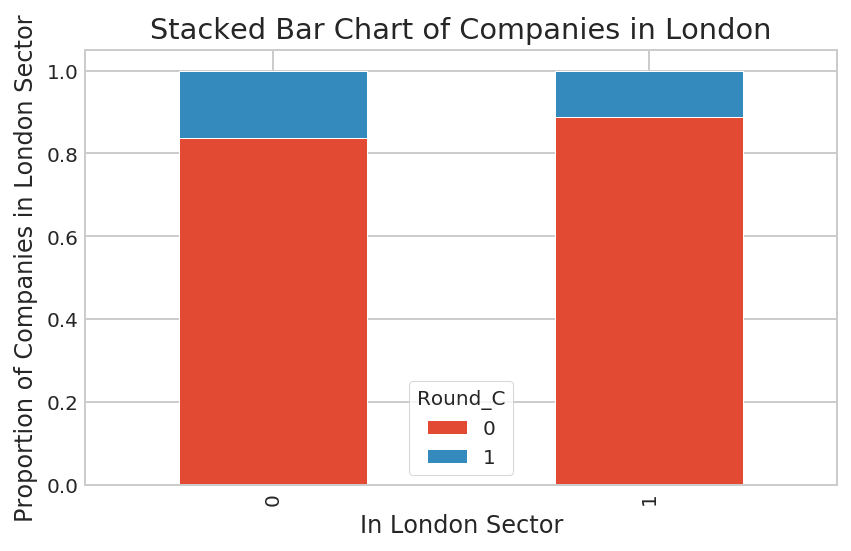

In [228]:
table=pd.crosstab(funds_df.London,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in London')
plt.xlabel('In London Sector')
plt.ylabel('Proportion of Companies in London Sector')
plt.savefig('mariral_vs_pur_stack')

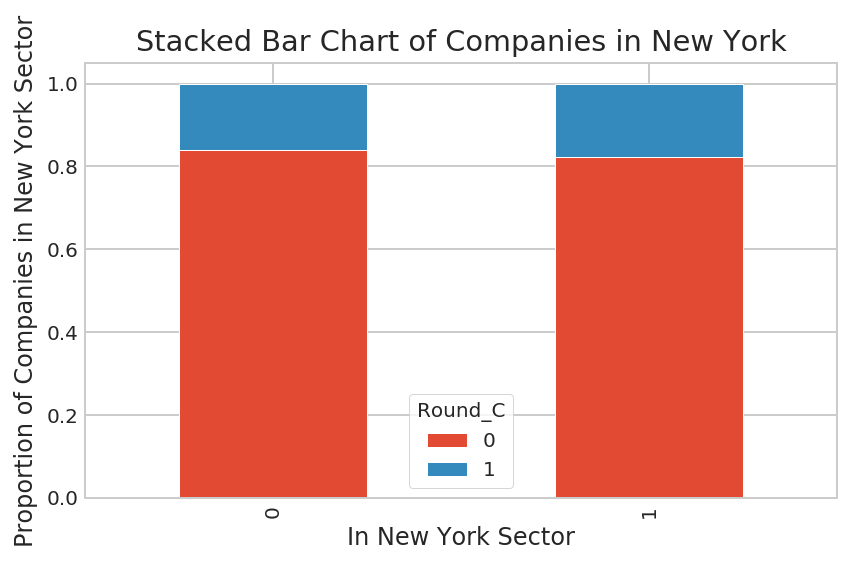

In [229]:
table=pd.crosstab(funds_df['New York'],funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in New York')
plt.xlabel('In New York Sector')
plt.ylabel('Proportion of Companies in New York Sector')
plt.savefig('mariral_vs_pur_stack')

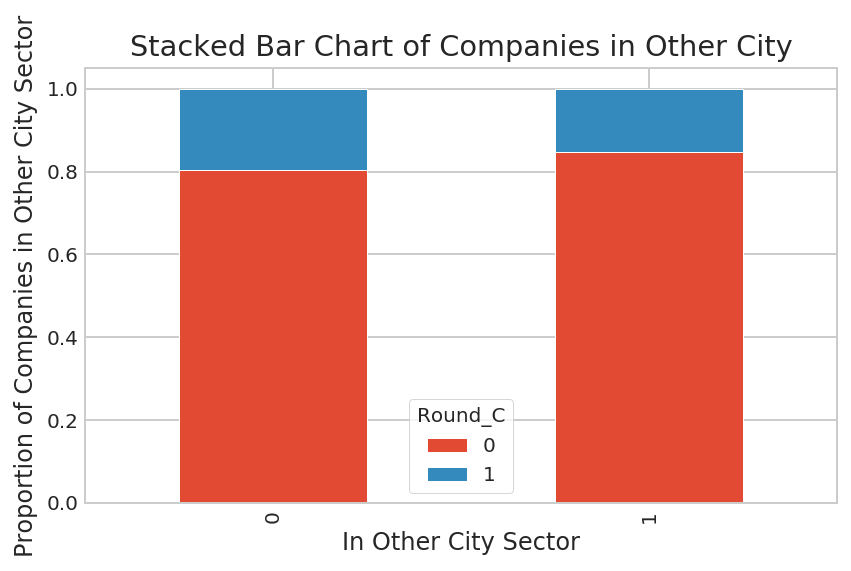

In [230]:
table=pd.crosstab(funds_df.Other_City,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in Other City')
plt.xlabel('In Other City Sector')
plt.ylabel('Proportion of Companies in Other City Sector')
plt.savefig('mariral_vs_pur_stack')

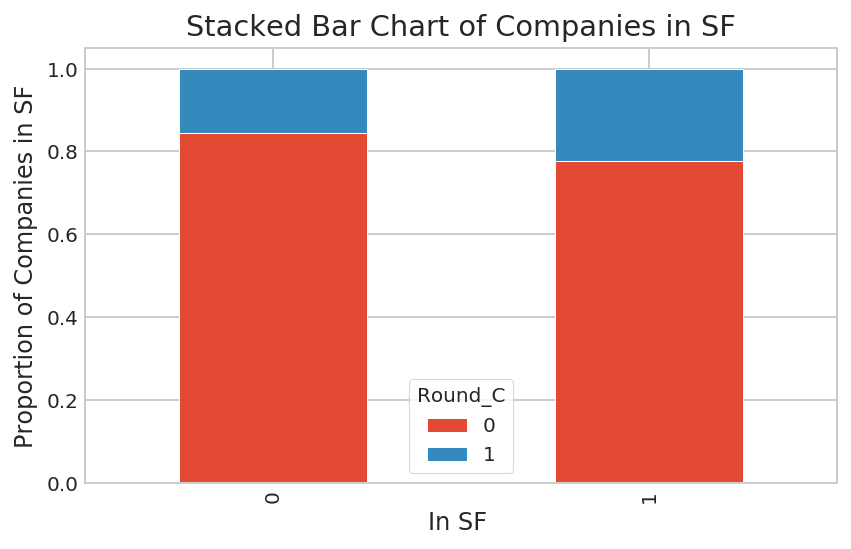

In [231]:
table=pd.crosstab(funds_df['San Francisco'],funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies in SF')
plt.xlabel('In SF ')
plt.ylabel('Proportion of Companies in SF')
plt.savefig('mariral_vs_pur_stack')

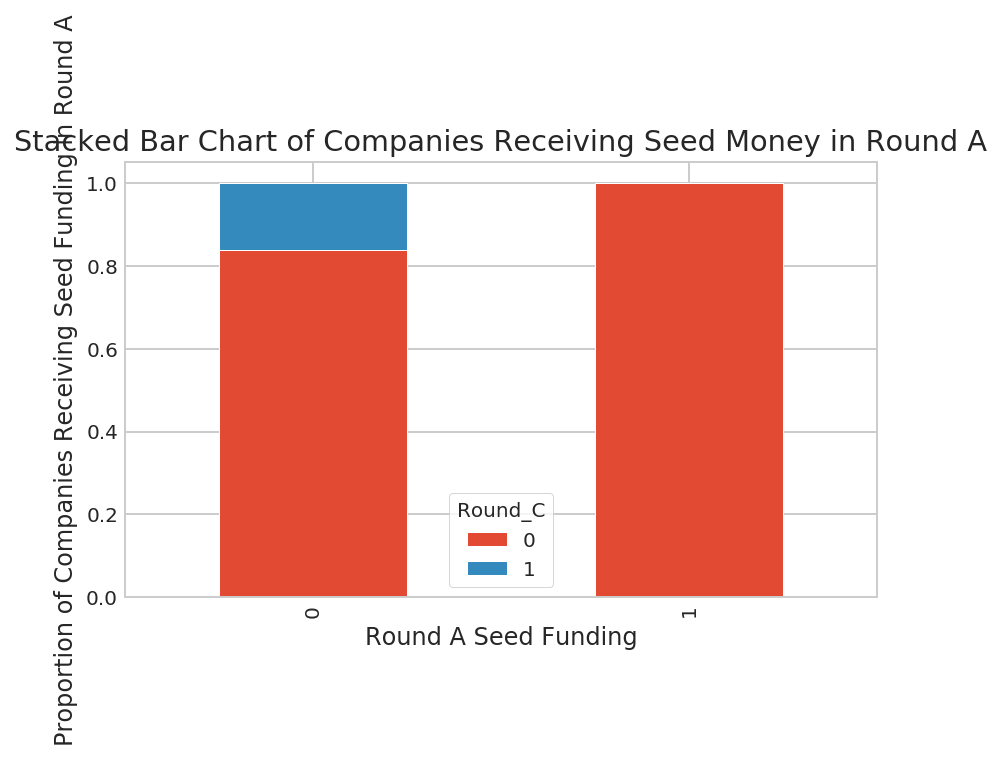

In [232]:
table=pd.crosstab(funds_df.seed,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving Seed Money in Round A')
plt.xlabel('Round A Seed Funding')
plt.ylabel('Proportion of Companies Receiving Seed Funding in Round A')
plt.savefig('mariral_vs_pur_stack')

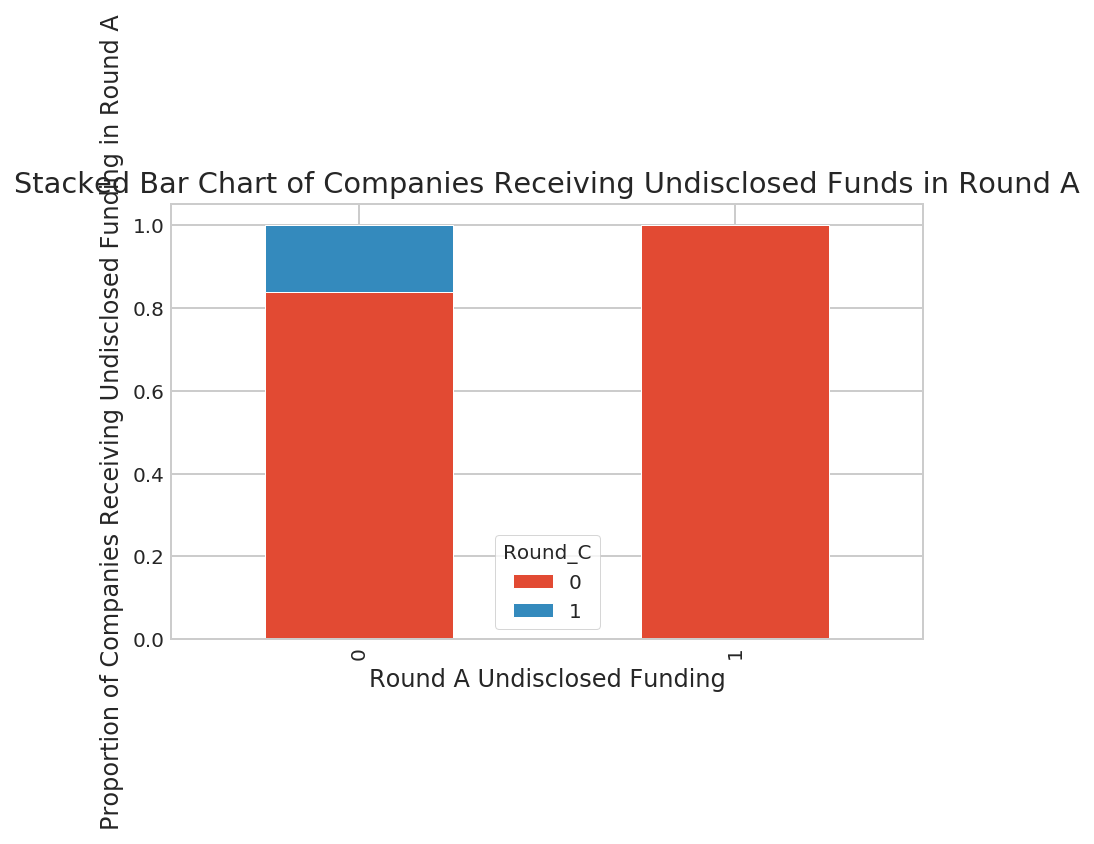

In [233]:
table=pd.crosstab(funds_df.undisclosed,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving Undisclosed Funds in Round A')
plt.xlabel('Round A Undisclosed Funding')
plt.ylabel('Proportion of Companies Receiving Undisclosed Funding in Round A')
plt.savefig('mariral_vs_pur_stack')

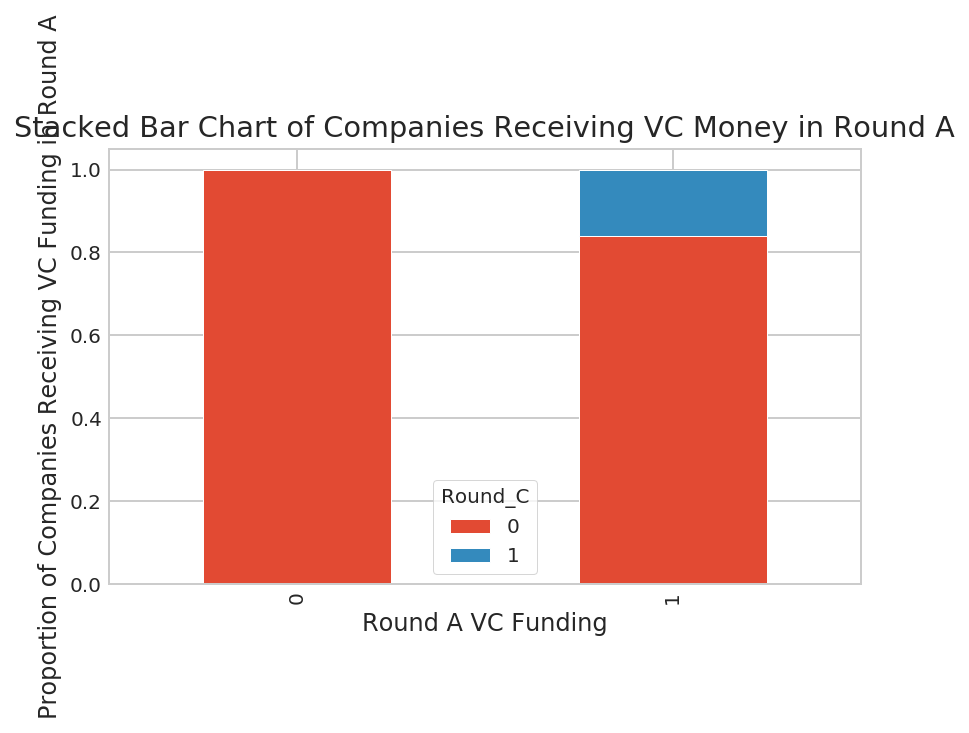

In [234]:
table=pd.crosstab(funds_df.venture,funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving VC Money in Round A')
plt.xlabel('Round A VC Funding')
plt.ylabel('Proportion of Companies Receiving VC Funding in Round A')
plt.savefig('mariral_vs_pur_stack')

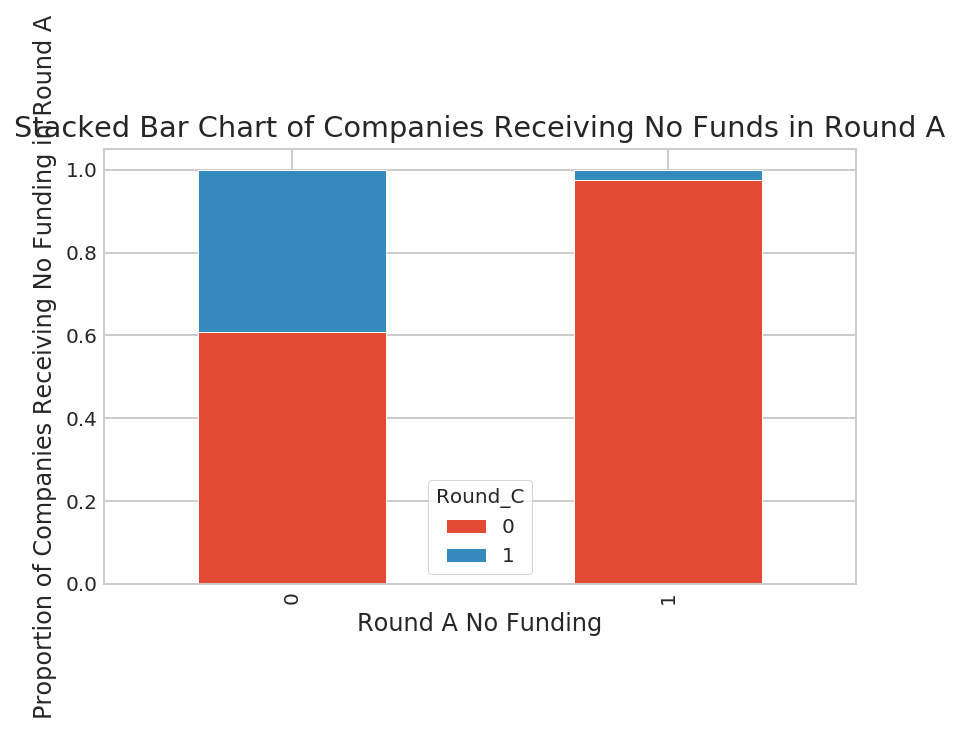

In [235]:
table=pd.crosstab(funds_df['None'], funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving No Funds in Round A')
plt.xlabel('Round A No Funding')
plt.ylabel('Proportion of Companies Receiving No Funding in Round A')
plt.savefig('mariral_vs_pur_stack')

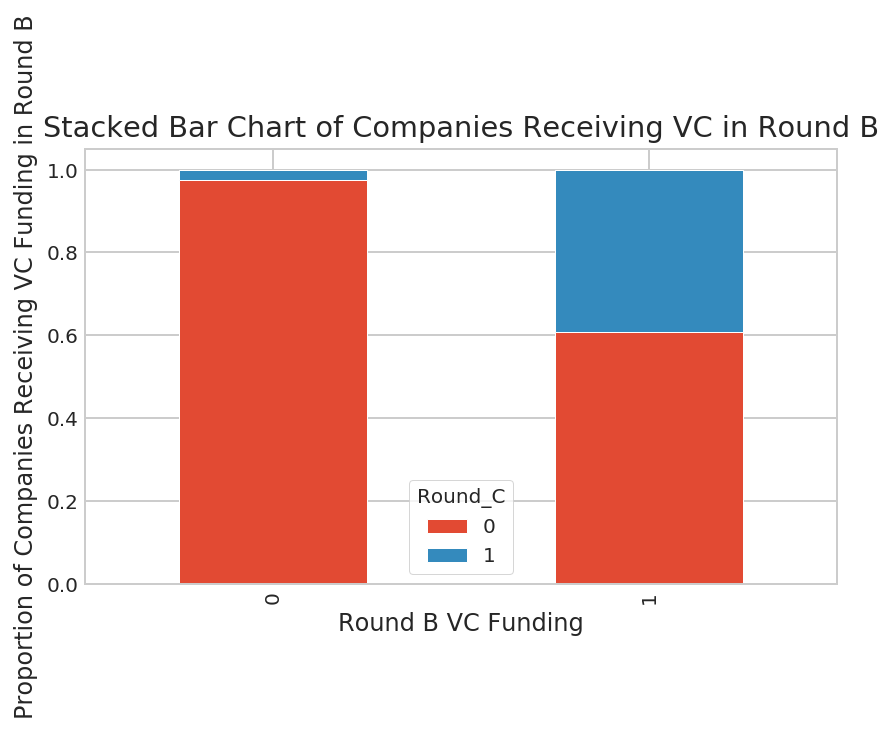

In [236]:
table=pd.crosstab(funds_df['venture.1'], funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving VC in Round B')
plt.xlabel('Round B VC Funding')
plt.ylabel('Proportion of Companies Receiving VC Funding in Round B')
plt.savefig('mariral_vs_pur_stack')

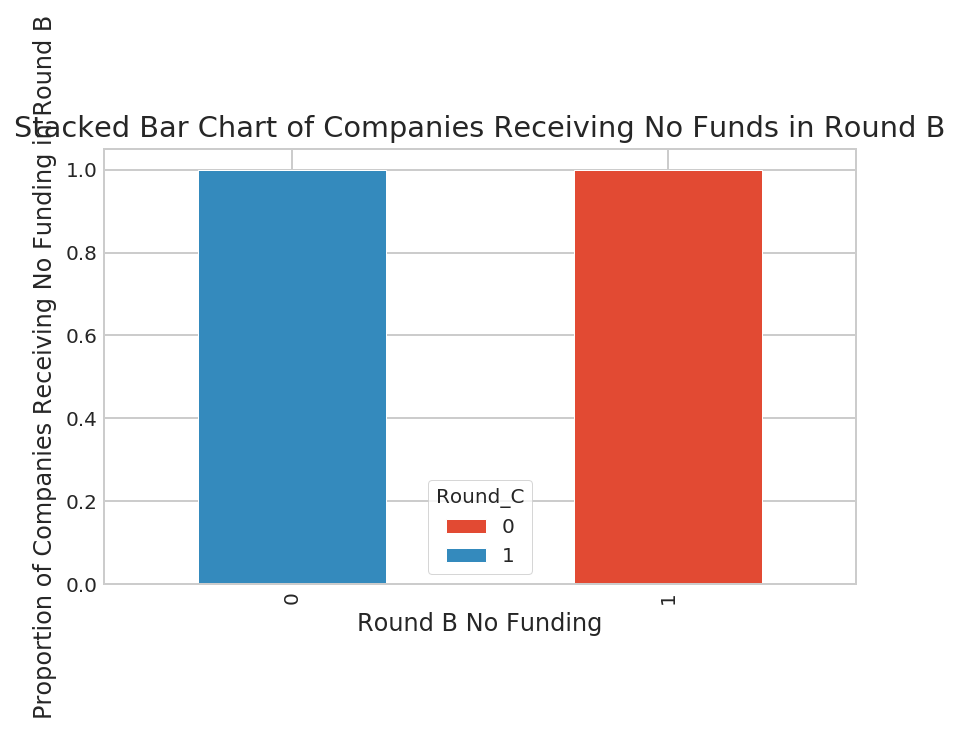

In [237]:
table=pd.crosstab(funds_df['None.1'], funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving No Funds in Round B')
plt.xlabel('Round B No Funding')
plt.ylabel('Proportion of Companies Receiving No Funding in Round B')
plt.savefig('mariral_vs_pur_stack')

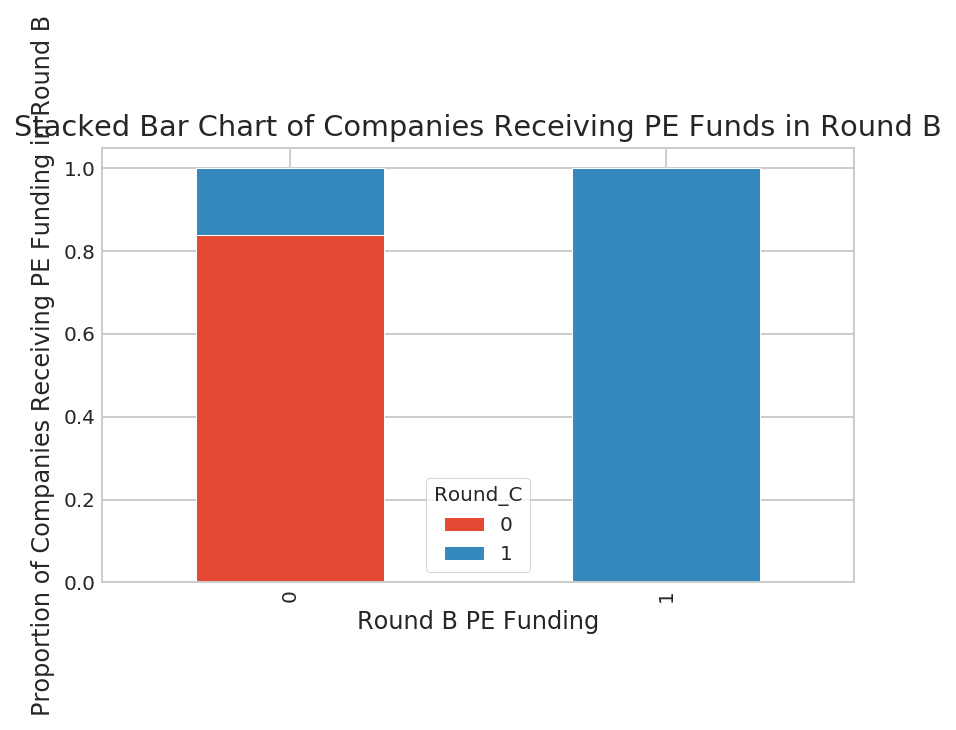

In [238]:
table=pd.crosstab(funds_df['private_equity'], funds_df.Round_C)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Companies Receiving PE Funds in Round B')
plt.xlabel('Round B PE Funding')
plt.ylabel('Proportion of Companies Receiving PE Funding in Round B')
plt.savefig('mariral_vs_pur_stack')

In [18]:
# basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
# create a imbalanced dataset of 10K with 2 class
x,y = make_classification(n_samples=10000  # number of samples
                          ,n_features=2    # feature/label count
                          ,n_informative=2 # informative features
                          ,n_redundant=0   # redundant features
                          ,n_repeated=0    # duplicate features
                          ,n_clusters_per_class=1  # number of clusters per class; clusters during plotting
                          ,weights=[0.99]   # proportions of samples assigned to each class
                          ,flip_y=0         # fraction of samples whose class is assigned randomly. 
                          ,random_state=13 )
# club together into a dataframe
df = funds_df.drop('Round_C', axis=1)
df['y'] = funds_df['Round_C']

In [19]:
# check the distribution
df['y'].value_counts()/df.shape[0]

0    0.838595
1    0.161405
Name: y, dtype: float64

In [20]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
# split dataset into x,y
x = df.drop('y',axis=1)
y = df['y']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [80]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)

# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.8328048428942059
Confusion Matrix: 
[[2867   52]
 [ 528   22]]
Area Under Curve: 0.5110928400137034
Recall score: 0.04
Precision score: 0.2972972972972973
F1 score: 0.07051282051282053


The confusion matrix shows that the model is able to correctly predict 21 of 550 samples in the minority class. 

Yikes!

Now add class weights by using the inverse of the label distribution. As demonstrated above, about 84% of Round C is 0 and the remaining 16% is 1.

In [81]:
# define class weights
w = {0:16, 1:84}
# define model
lg2 = LogisticRegression(random_state=13, class_weight = w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.7982127414240415
Confusion Matrix: 
[[2396  523]
 [ 177  373]]
Area Under Curve: 0.7495054346133483
Recall score: 0.6781818181818182
Precision score: 0.41629464285714285
F1 score: 0.5159059474412172


With weighted logistic regreson, AUC increased to 0.7548 from 0.5096 while Recall Score also improved to 0.6927 from 0.0381. Importantly, correct predictions for the minority class improved greatly with 381 correct predictions out of 550. 

Now using GridSearch, we can find an optimum combination of weights.

In [23]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [ ]:
# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(x,y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [74]:
# define class weights
w = {0: 5, 1: 90}
# define model
lg2 = LogisticRegression(random_state=13, class_weight = w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.1585471317382531
Confusion Matrix: 
[[   0 2919]
 [   0  550]]
Area Under Curve: 0.5
Recall score: 1.0
Precision score: 0.1585471317382531


In [26]:
funding_df_vars=funds_df.columns.values.tolist()
y=funds_df.Round_C
X=[i for i in funding_df_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True False
 False  True  True  True False False  True  True  True False False  True
  True  True  True False]
[1 1 1 1 1 1 3 1 1 1 1 2 5 1 1 1 6 4 1 1 1 7 9 1 1 1 1 8]


In [27]:
funds_df.columns

Index(['funded_year_A', 'raised_A', 'Round_B', 'funded_year_B', 'raised_B',
       'Round_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
       'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
       'Software', 'Beijing', 'London', 'New York', 'Other_City',
       'San Francisco', 'Seed_A', 'Undisclosed_A', 'Venture_A', 'None_A',
       'Venture_B', 'None.1', 'Private_Equity_B'],
      dtype='object')

Important columns are:
    - Funded Year A
    - Raised A
    - Round B
    - Funded Year B
    - Raised B
    - China
    - Great Britain
    - Other Country
    - USA
    - Biotech
    - London
    - New York
    - Other City
    - Seed 
    - Undisclosed
    - None Round B
    - Private Equtiy
    - Venture Capital Round B
    
    
    

In [30]:
feat_df = funds_df.drop(columns=['DEU', 'GBR', 'Software','E-Commerce', 'Enterprise Software', 
                                 'Mobile', 'Other_Industry', 'Beijing', 'San Francisco', 'Venture_A', 
                                 'None_A', 'Venture_B', ])

In [31]:
feat_df.columns

Index(['funded_year_A', 'raised_A', 'Round_B', 'funded_year_B', 'raised_B',
       'Round_C', 'CHN', 'Other_Country', 'USA', 'Biotechnology', 'London',
       'New York', 'Other_City', 'Seed_A', 'Undisclosed_A', 'None.1',
       'Private_Equity_B'],
      dtype='object')

### Try Using Recursive Feature Engineering (RFE)

In [32]:
# split dataset into x,y
x = feat_df.drop('Round_C',axis=1)
y = feat_df['Round_C']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [82]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)

# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.8328048428942059
Confusion Matrix: 
[[2867   52]
 [ 528   22]]
Area Under Curve: 0.5110928400137034
Recall score: 0.04
Precision score: 0.2972972972972973
F1 score: 0.07051282051282053


In [83]:
# define class weights
w = {0:16, 1:84}
# define model
lg2 = LogisticRegression(random_state=13, class_weight = w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.7982127414240415
Confusion Matrix: 
[[2396  523]
 [ 177  373]]
Area Under Curve: 0.7495054346133483
Recall score: 0.6781818181818182
Precision score: 0.41629464285714285
F1 score: 0.5159059474412172


### Try Using Feature Selector From Random Forest

Important Columns from Random Forest selector:
    - Round_B
    - Funded Year B
    - Raised B
    - None Round A
    - Venture Round B
    - None Round B
    - Venture Round B

In [93]:
funds_df.columns

Index(['funded_year_A', 'raised_A', 'Round_B', 'funded_year_B', 'raised_B',
       'Round_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
       'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
       'Software', 'Beijing', 'London', 'New York', 'Other_City',
       'San Francisco', 'Seed_A', 'Undisclosed_A', 'Venture_A', 'None_A',
       'Venture_B', 'None.1', 'Private_Equity_B'],
      dtype='object')

In [94]:
feat2_df = funds_df.drop(columns=['funded_year_A', 'raised_A', 'DEU', 'GBR', 'Software','E-Commerce', 
                                  'Enterprise Software', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 
                                  'Biotechnology','E-Commerce', 'Enterprise Software', 'Mobile', 
                                  'Other_Industry','Software', 'Beijing', 'London', 'New York', 
                                  'Other_City','San Francisco', 'Seed_A', 'Undisclosed_A', 'Venture_A', 'None_A', 
                                  'Venture_B',])

In [95]:
# split dataset into x,y
x = feat2_df.drop('Round_C',axis=1)
y = feat2_df['Round_C']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [96]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)

# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.8328048428942059
Confusion Matrix: 
[[2867   52]
 [ 528   22]]
Area Under Curve: 0.5110928400137034
Recall score: 0.04
Precision score: 0.2972972972972973
F1 score: 0.07051282051282053


In [108]:
# define class weights
w = {0:16, 1:84}
# define model
lg2 = LogisticRegression(random_state=13, class_weight = w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.7982127414240415
Area Under Curve: 0.7495054346133483
Recall score: 0.6781818181818182
Precision score: 0.41629464285714285
F1 score: 0.5159059474412172


In [103]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2396  523]
 [ 177  373]]


Overall, the model using RFE(recursive feature selection) was most accurate

#### Plot Confusion Matrix

NameError: name 'score' is not defined

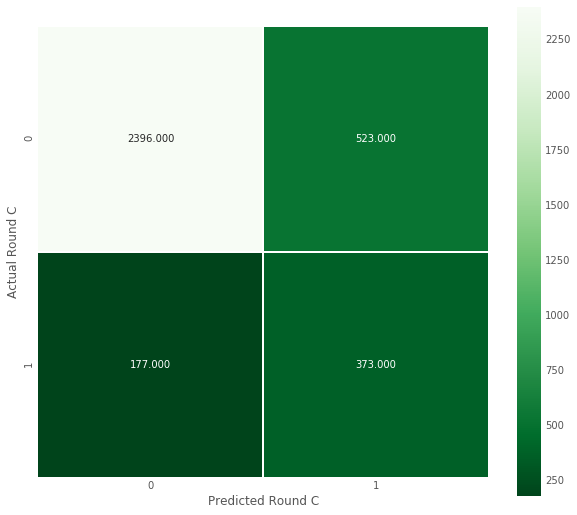

In [111]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual Round C');
plt.xlabel('Predicted Round C');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
# Print confusion matrix 
lg_confusion = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.heatmap(lg_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=feat2_df['Round C'],
           yticklabels=feat2_df['Round C'])

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN confusion matrix');

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

labels = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]
categories = [‘Zero’, ‘One’]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap=’binary’)

### Get Feature Importance Chart

In [41]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [42]:
correlated_features = set()
correlation_matrix = funds_df.drop('Round_C', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [43]:
correlated_features

{'None_A', 'Venture_A', 'Venture_B', 'funded_year_B'}

In [47]:
f_df = funds_df.drop(columns=['funded_year_B', 'Venture_A', 'Venture_B', 'None_A'])

In [48]:
X = f_df.drop('Round_C', axis=1)
target = f_df['Round_C']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [49]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 1


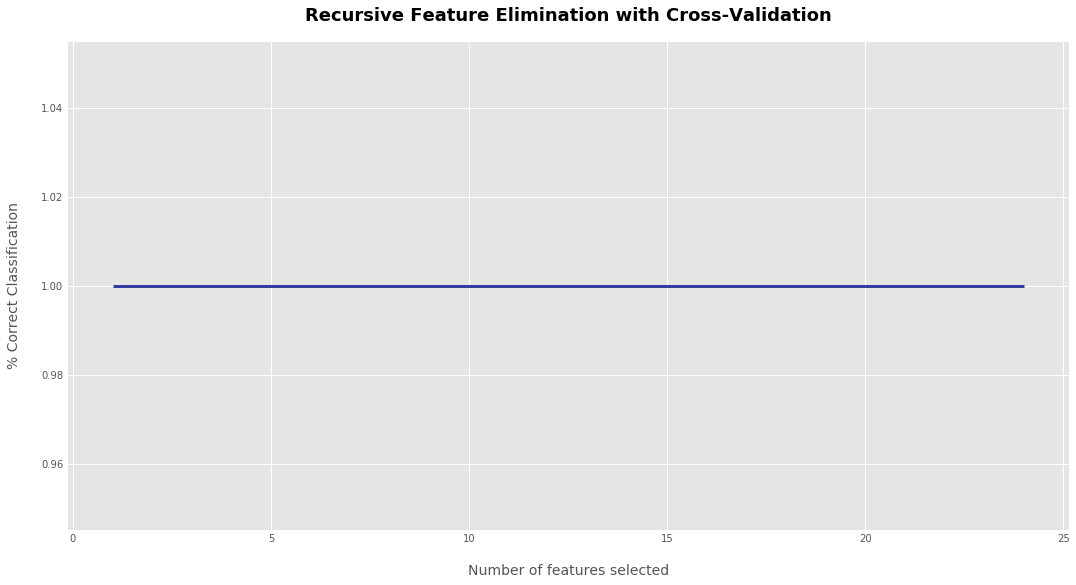

In [50]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [56]:
rfecv.estimator_.feature_importances_

array([1.])

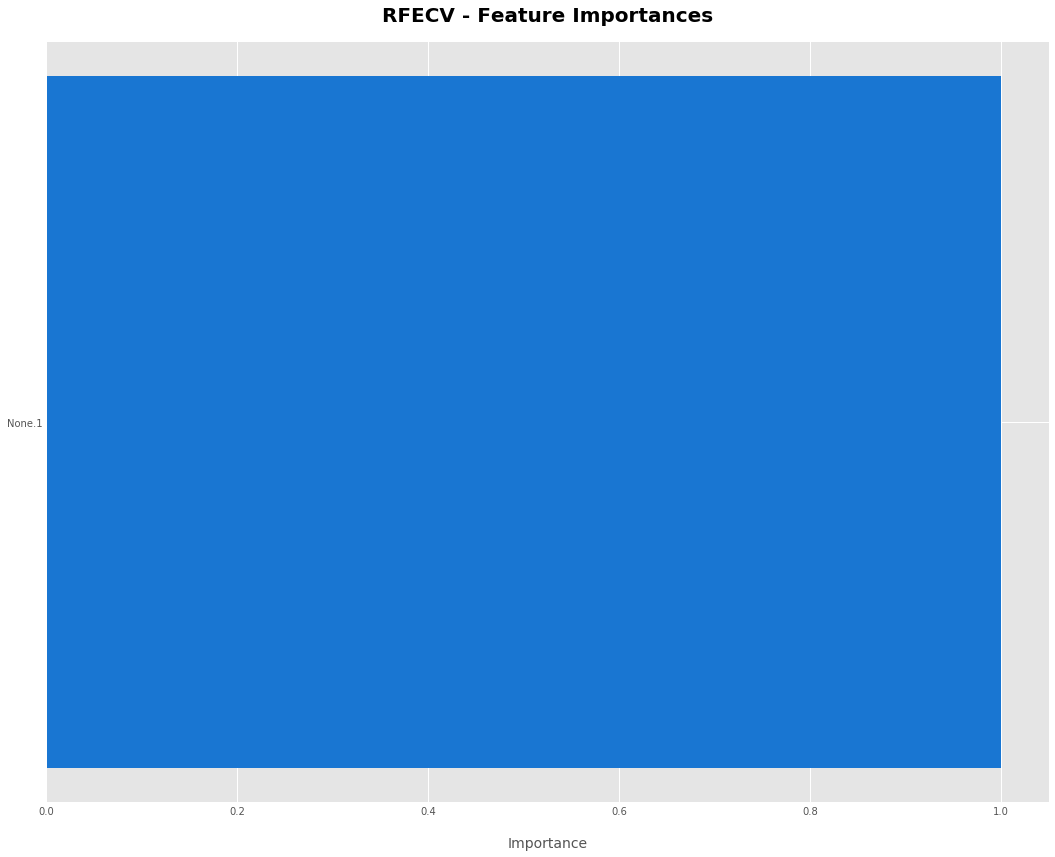

In [57]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [64]:
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [65]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [66]:
X = funds_df.drop('Round_C', axis=1)
target = funds_df['Round_C']
colnames = funds_df.columns

In [67]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [ ]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 


### GridSearch CV
#### RFE Data

In [245]:
#import wget
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
#from pandas_ml import ConfusionMatrix

from sklearn.metrics import confusion_matrix

In [268]:
X = f_df.drop('Round_C', axis=1)
target = f_df['Round_C']

In [269]:
for i in range(len(y)):
    if y[i] > 0:
        y[i] = 0
    elif y[i] < 1:
        y[i] = 1

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [85]:
# define class weights
w = {0:16, 1:84}
# define model
rf = LogisticRegression(random_state=13, class_weight = w)
# fit it
model = rf.fit(X_train,y_train)
# test
y_pred = rf.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

#rf = LogisticRegression()
#model = rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
#ConfusionMatrix(y_test, y_pred)

Accuracy Score: 0.7982127414240415
Confusion Matrix: 
[[2396  523]
 [ 177  373]]
Area Under Curve: 0.7495054346133483
Recall score: 0.6781818181818182
F1 score: 0.5159059474412172


In [272]:
print('Precision is:'+str(round(precision_score(y_test, y_pred),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred, average='binary'),2)))

Precision is:0.84
Recall is:1.0
F1 score is:0.91


In [273]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

In [274]:
lr = LogisticRegression(class_weight = w)
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0, scoring='recall')

In [275]:
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', round(best_model.best_estimator_.get_params()['C'],2))

Best Penalty: l2
Best C: 1.0


In [276]:
y_pred_gs = best_model.predict(X_test)
cm_gs = confusion_matrix(y_test, y_pred_gs)
print(cm_gs)
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('Precision is:'+str(round(precision_score(y_test, y_pred_gs),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred_gs, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred_gs, average='binary'),2)))

[[   1  614]
 [   1 3200]]
Area Under Curve: 0.5006568069429522
Precision is:0.84
Recall is:1.0
F1 score is:0.91


### GridSearch CV
#### Full Data

In [277]:
X = funds_df.drop('Round_C', axis=1)
target = funds_df['Round_C']

In [278]:
for i in range(len(y)):
    if y[i] > 0:
        y[i] = 0
    elif y[i] < 1:
        y[i] = 1

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [280]:
# define class weights
w = {0:16, 1:84}
# define model
rf = LogisticRegression(random_state=13, class_weight = w)
# fit it
model = rf.fit(X_train,y_train)
# test
y_pred = rf.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')


Accuracy Score: 0.8100104821802935
Confusion Matrix: 
[[2665  525]
 [ 200  426]]
Area Under Curve: 0.7579671898003945
Recall score: 0.6805111821086262


In [281]:
print('Precision is:'+str(round(precision_score(y_test, y_pred),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred, average='binary'),2)))

Precision is:0.45
Recall is:0.68
F1 score is:0.54


In [282]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

In [283]:
lr = LogisticRegression(class_weight=w)
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0, scoring='recall')

In [284]:
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', round(best_model.best_estimator_.get_params()['C'],2))

Best Penalty: l2
Best C: 1.0


In [285]:
y_pred_gs = best_model.predict(X_test)
cm_gs = confusion_matrix(y_test, y_pred_gs)
print(cm_gs)
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('Precision is:'+str(round(precision_score(y_test, y_pred_gs),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred_gs, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred_gs, average='binary'),2)))

[[2665  525]
 [ 200  426]]
Area Under Curve: 0.7579671898003945
Precision is:0.45
Recall is:0.68
F1 score is:0.54


NameError: name 'average_precision' is not defined

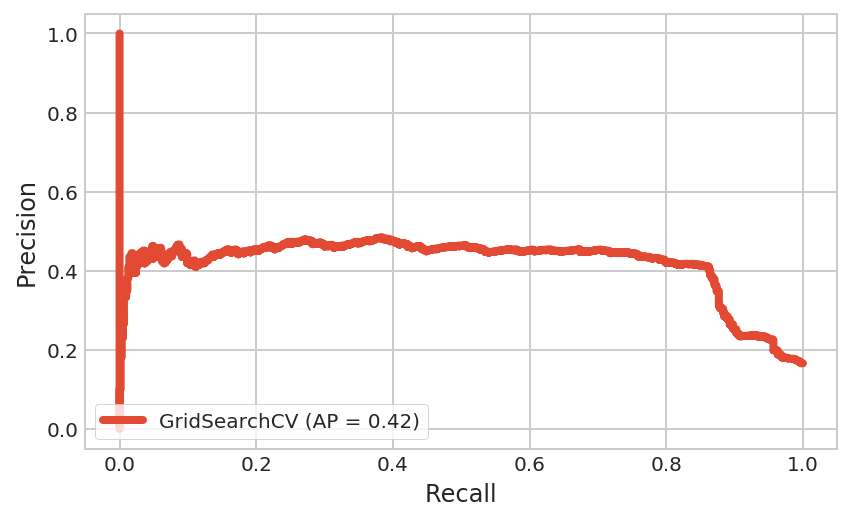

In [289]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(best_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
x1 = funds_df.drop('Round_C', axis=1) # Obesrvations
y1 = funds_df['Round_C'] # Response variable


x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=0)

logreg = LogisticRegression().fit(x1_train,y1_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(x1_train,y1_train)))
print("Test set score: {:.3f}".format(logreg.score(x1_test,y1_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary())